In [20]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.filters import threshold_otsu
from PIL import Image
from skimage.measure import compare_ssim as ssim
from skimage.measure import regionprops

In [ ]:
x_data_controls = pd.read_csv('../../data/train_controls.csv')
x_data_controls

In [ ]:
experiment = x_data_controls['experiment'][0:100].values
plates = x_data_controls['plate'][0:100].values
wells = x_data_controls['well'][0:100].values

print(experiment)

In [ ]:
site_img = np.empty((100, 512, 512), dtype=np.int)

for i in range(site_img.shape[0]):
    path = f'../../data/train/{experiment[i]}/Plate{plates[i]}/{wells[i]}_s1_w1.png'
    site_img[i,:,:] = np.asarray(Image.open(path))

In [ ]:
site_img[1,:,:]

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title('negative control group')
plt.imshow(site_img[0,:,:])
plt.colorbar()
plt.subplot(1,3,2)
plt.title('positive control group')
plt.imshow(site_img[3,:,:])
plt.colorbar()
plt.subplot(1,3,3)
plt.title('positive control group')
plt.imshow(site_img[4,:,:])
plt.colorbar()
plt.show()

print("SSIM between neg_control and pos_control1: ", ssim(np.asarray(neg_test_img), np.asarray(pos_test_img1)))
print("SSIM between neg_control and pos_control2: ", ssim(np.asarray(neg_test_img), np.asarray(pos_test_img2)))
print("SSIM between pos_control1 and pos_control2: ", ssim(np.asarray(pos_test_img1), np.asarray(pos_test_img2)))
print("SSIM between pos_control1 and pos_control2: ", ssim(np.asarray(pos_test_img1), np.asarray(pos_test_img2)))

In [ ]:
ssim_arr = np.empty((100,1))

for i in range(7,100):
#     print(ssim(site_img[0,:,:], site_img[i,:,:], data_range=255))
    ssim_arr[i,0] = ssim(site_img[6,:,:], site_img[i,:,:], data_range=255)

In [ ]:
print(np.mean(ssim_arr))

In [ ]:
print(np.mean(ssim_arr))

In [ ]:
y_train = np.load("../../data/train_parsed/y_HUVEC-16_1_B11_s1.npy", allow_pickle=True)
print("Shape: ", y_train.shape)
print("Class: ", np.argmax(y_train))

In [ ]:
y_train = np.load("../../data/train_parsed/y_HUVEC-16_1_B03_s1.npy", allow_pickle=True)
print("Shape: ", y_train.shape)
print("Class: ", np.argmax(y_train))

------------------

In [ ]:
img = np.load("../../data/train_parsed/x_HUVEC-16_1_B11_s1.npy", allow_pickle=True)
print(img.shape)

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
plt.imshow(np.asarray(img[:,:,0]*255, dtype=np.int))
plt.subplot(2,3,2)
plt.imshow(np.asarray(img[:,:,1]*255, dtype=np.int))
plt.subplot(2,3,3)
plt.imshow(np.asarray(img[:,:,2]*255, dtype=np.int))
plt.subplot(2,3,4)
plt.imshow(np.asarray(img[:,:,3]*255, dtype=np.int))
plt.subplot(2,3,5)
plt.imshow(np.asarray(img[:,:,4]*255, dtype=np.int))
plt.subplot(2,3,6)
plt.imshow(np.asarray(img[:,:,5]*255, dtype=np.int))
plt.show()

In [ ]:
test_img = np.asarray(img[:,:,0]*255, dtype=np.int)

thres = threshold_otsu(test_img)
print(thres)
test_img_thres = np.asarray(test_img > thres, dtype=np.int)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(test_img[0:25,0:25])
# plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(test_img_thres[0:25, 0:25])
plt.show()

In [ ]:
regions = regionprops(label_image=test_img_thres[0:25, 0:25], intensity_image=test_img[0:25, 0:25])

In [ ]:
for props in regions:
    print("Area: ", props.area)
    print("Bbox: ", props.bbox)
    print("bbox_area: ", props.bbox_area)
    print("centroid: ", props.centroid)
    print("convex_area: ", props.convex_area)
    print("eccentricity: ", props.eccentricity)
    print("equivalent_diameter: ", props.equivalent_diameter)
    print("euler_number: ", props.euler_number)
    print("filled_area: ", props.filled_area)
    print("inertia_tensor: ", props.inertia_tensor)
    print("inertia_tensor_eigvals: ", props.inertia_tensor_eigvals)
    print("local_centroid: ", props.local_centroid)
    print("major_axis_length: ", props.major_axis_length)
    print("max_intensity: ", props.max_intensity)
    print("mean_intensity: ", props.mean_intensity)
    print("min_intensity: ", props.min_intensity)
    print("minor_axis_length: ", props.minor_axis_length)
    print("moments: ", props.moments)
    print("moments_central: ", props.moments_central)
    print("moments_hu: ", props.moments_hu)
    print("moments_normalized: ", props.moments_normalized)
    
    
    print("orientation: ", props.orientation)    

In [ ]:
from skimage.filters import try_all_threshold
test_img = np.asarray(img[:,:,4]*255, dtype=np.int)

fig, ax = try_all_threshold(test_img, figsize=(30, 20), verbose=False)
plt.show()

In [ ]:
test_img = np.asarray(img[:,:,1]*255, dtype=np.int)

thresh = threshold_otsu(test_img)

# thresh = 30
print(thresh)

binary = test_img > thresh

fig = plt.subplots(ncols=4, figsize=(30, 10))
#ax = axes.ravel()

plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(test_img)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(binary, cmap=plt.cm.gray)
plt.title('Thresholded')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(test_img*binary)
plt.title('Binary mask applied')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.hist(test_img.ravel(), bins=256)
plt.ylim([0,2500])
plt.title('Histogram')
plt.axvline(thresh, color='r')

plt.show()

---------------------------

In [ ]:
img = np.load("../../data/train_parsed/x_HUVEC-16_1_B03_s1.npy", allow_pickle=True)
print(img.shape)

In [ ]:
from skimage.filters import try_all_threshold
test_img = np.asarray(img[:,:,1]*255, dtype=np.int)

fig, ax = try_all_threshold(test_img, figsize=(30, 20), verbose=False)
plt.show()

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
plt.imshow(np.asarray(img[:,:,0]*255, dtype=np.int))
plt.subplot(2,3,2)
plt.imshow(np.asarray(img[:,:,1]*255, dtype=np.int))
plt.subplot(2,3,3)
plt.imshow(np.asarray(img[:,:,2]*255, dtype=np.int))
plt.subplot(2,3,4)
plt.imshow(np.asarray(img[:,:,3]*255, dtype=np.int))
plt.subplot(2,3,5)
plt.imshow(np.asarray(img[:,:,4]*255, dtype=np.int))
plt.subplot(2,3,6)
plt.imshow(np.asarray(img[:,:,5]*255, dtype=np.int))
plt.show()

In [ ]:
test_img = np.asarray(img[:,:,4]*255, dtype=np.int)

fft_img = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(test_img)))

fft_crop = crop_center(fft_img, 75, 75)

ifft_img = np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(fft_crop)))

In [ ]:
plt.hist(test_img.flatten(), bins=150)
plt.show()

In [ ]:
# thresh = threshold_otsu(test_img)
print(thresh)
thresh = 45
binary = test_img > thresh

fig = plt.subplots(ncols=4, figsize=(30, 10))
#ax = axes.ravel()

plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(test_img)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(binary, cmap=plt.cm.gray)
plt.title('Thresholded')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(test_img*binary)
plt.title('Binary mask applied')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.hist(test_img.ravel(), bins=256)
plt.ylim([0,2500])
plt.title('Histogram')
plt.axvline(thresh, color='r')

plt.show()

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
plt.imshow(test_img)
plt.subplot(1,2,2)
plt.imshow(np.abs(ifft_img))
plt.show()

In [ ]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

---------------------

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.filters import threshold_otsu
from PIL import Image
from skimage.measure import compare_ssim as ssim
from skimage.measure import regionprops
import os
from skimage import data, exposure, img_as_float
from skimage.exposure import histogram
from skimage import measure
import matplotlib.pyplot as plt

%matplotlib inline

In [51]:
prefixed = [filename for filename in os.listdir('../../data/train_parsed_pos_control/') if filename.startswith("x_HEPG2-01_1_")]
prefixed_reg = [filename for filename in os.listdir('../../data/train_parsed/') if filename.startswith("x_HEPG2-01_1_")]

In [52]:
len(prefixed_reg)

552

In [57]:
exper_plate_1_reg_samples = np.empty(shape=(len(prefixed_reg),512,512))
exper_plate_1_samples_pos_control = np.empty(shape=(len(prefixed),512,512))

for i in range(exper_plate_1_samples_pos_control.shape[0]):
    exper_plate_1_samples_pos_control[i,:,:] = np.load(f'../../data/train_parsed_pos_control/{prefixed[i]}', allow_pickle=True)[:,:,0]*255
    
for i in range(exper_plate_1_reg_samples.shape[0]):
    exper_plate_1_reg_samples[i,:,:] = np.load(f'../../data/train_parsed/{prefixed_reg[i]}', allow_pickle=True)[:,:,0]*255

In [58]:
exper_plate_1_samples_pos_control.shape

(60, 512, 512)

In [59]:
exper_plate_1_reg_samples.shape

(552, 512, 512)

In [73]:
features_reg = np.empty(shape=(len(prefixed_reg),5))

for i in range(len(prefixed_reg)):
    features_reg[i,0] = np.mean(exper_plate_1_reg_samples[i,:,:])
    features_reg[i,1] = np.std(exper_plate_1_reg_samples[i,:,:])
    features_reg[i,2] = np.amax(exper_plate_1_reg_samples[i,:,:])
    features_reg[i,3] = np.amin(exper_plate_1_reg_samples[i,:,:])
    features_reg[i,4] = measure.shannon_entropy(exper_plate_1_reg_samples[i,:,:], base=2)

features_pos = np.empty(shape=(len(prefixed),5))

for i in range(len(prefixed)):
    features_pos[i,0] = np.mean(exper_plate_1_samples_pos_control[i,:,:])
    features_pos[i,1] = np.std(exper_plate_1_samples_pos_control[i,:,:])
    features_pos[i,2] = np.amax(exper_plate_1_samples_pos_control[i,:,:])
    features_pos[i,3] = np.amin(exper_plate_1_samples_pos_control[i,:,:])
    features_pos[i,4] = measure.shannon_entropy(exper_plate_1_samples_pos_control[i,:,:], base=2)

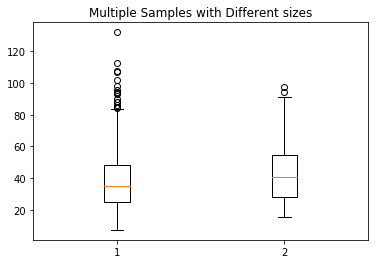

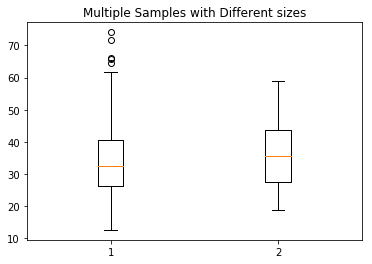

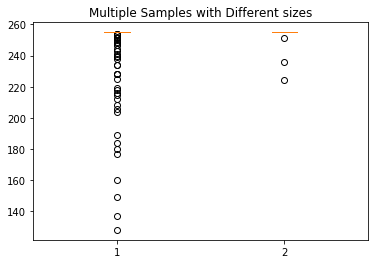

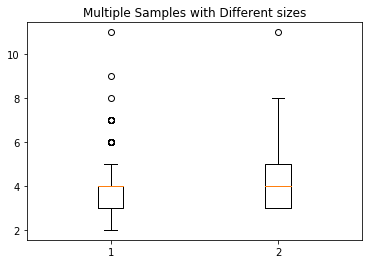

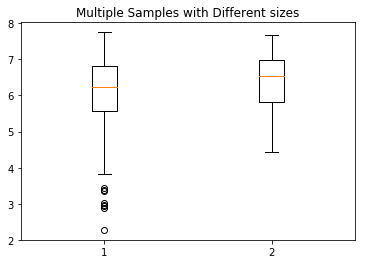

In [81]:
data = [features_reg[:,0], features_pos[:,0]]
fig7, ax1 = plt.subplots()
ax1.set_title('Multiple Samples with Different sizes')
ax1.boxplot(data)
plt.show()

data = [features_reg[:,1], features_pos[:,1]]
fig7, ax1 = plt.subplots()
ax1.set_title('Multiple Samples with Different sizes')
ax1.boxplot(data)
plt.show()

data = [features_reg[:,2], features_pos[:,2]]
fig7, ax1 = plt.subplots()
ax1.set_title('Multiple Samples with Different sizes')
ax1.boxplot(data)
plt.show()

data = [features_reg[:,3], features_pos[:,3]]
fig7, ax1 = plt.subplots()
ax1.set_title('Multiple Samples with Different sizes')
ax1.boxplot(data)
plt.show()

data = [features_reg[:,4], features_pos[:,4]]
fig7, ax1 = plt.subplots()
ax1.set_title('Multiple Samples with Different sizes')
ax1.boxplot(data)
plt.show()


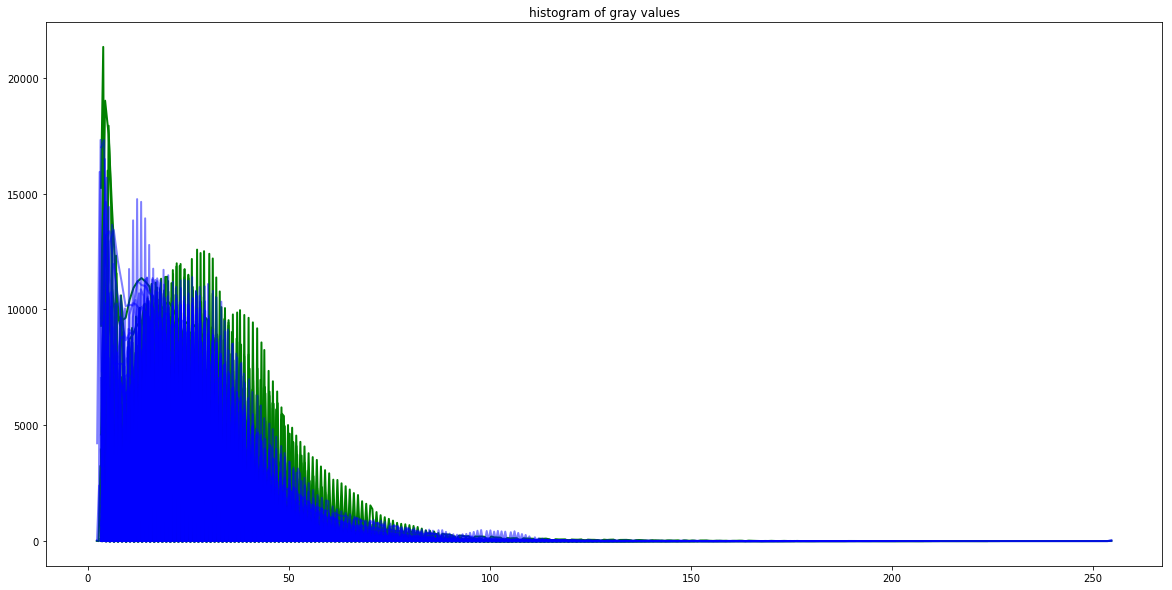

In [48]:
channel = 1

plt.figure(figsize=(20, 10))

pos_control_hist = np.empty(shape=(50,256))
reg_hist = np.empty(shape=(50,256))

for i in range(exper_plate_1_samples_pos_control.shape[0]):
    hist, hist_centers = histogram(exper_plate_1_samples_pos_control[i,:,:,channel])
    plt.plot(hist_centers, hist, lw=2, color='g')
    pos_control_hist[i,:] = hist
    
for k in range(exper_plate_1_reg_samples.shape[0]):
    hist, hist_centers = histogram(exper_plate_1_reg_samples[k,:,:,channel])
    plt.plot(hist_centers, hist, lw=2, color='b', alpha=0.5)
    reg_hist[k,:] = hist

plt.title('histogram of gray values')
plt.show()

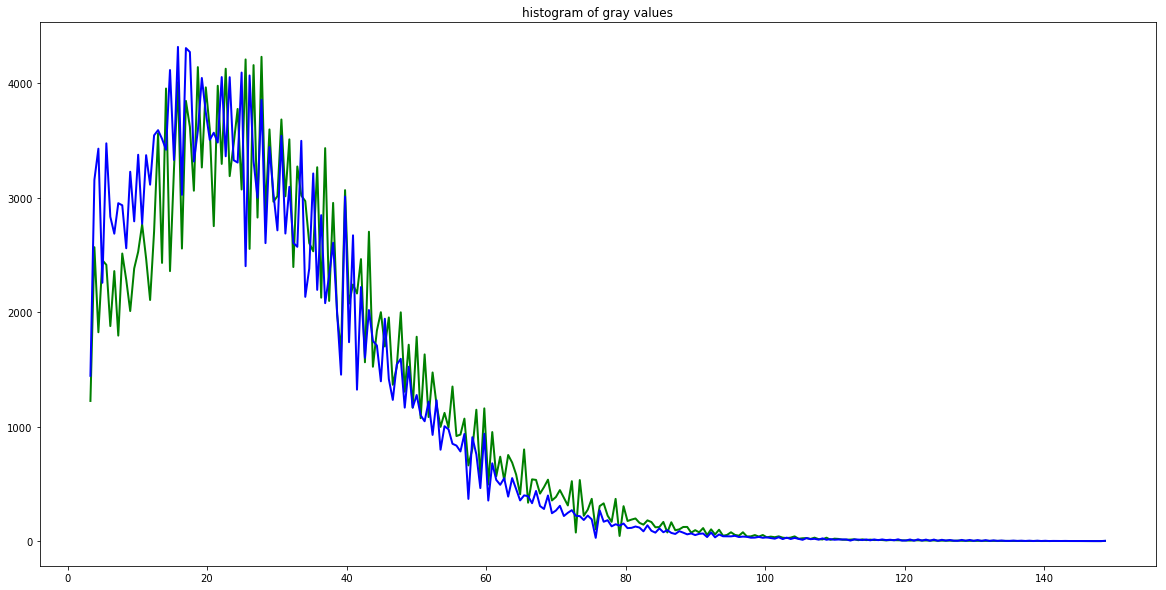

In [49]:
plt.figure(figsize=(20, 10))
plt.plot(hist_centers, np.mean(pos_control_hist, axis=0), lw=2, color='g')
plt.plot(hist_centers, np.mean(reg_hist, axis=0), lw=2, color='b')
plt.title('histogram of gray values')
plt.show()